In [7]:
import pandas as pd

# Load the dataset
file_path = "/Users/maximcrucirescu/Desktop/dtu notes/sem 6/math_modelling/githubvenv/Project 2/Libian_desert_data.csv"
df = pd.read_csv(file_path)

# Display the first few rows to understand its structure
df.head()


,0.000000000000000000e+00,0.000000000000000000e+00.1,0.000000000000000000e+00.2
0,1.0,0.0,0.0
1,2.0,0.0,0.0
2,3.0,0.0,0.0
3,4.0,0.0,0.0
4,5.0,0.0,0.0


In [8]:
df.columns= ["x","y","label"]
df.head()

,x,y,label
0,1.0,0.0,0.0
1,2.0,0.0,0.0
2,3.0,0.0,0.0
3,4.0,0.0,0.0
4,5.0,0.0,0.0


## Plotting

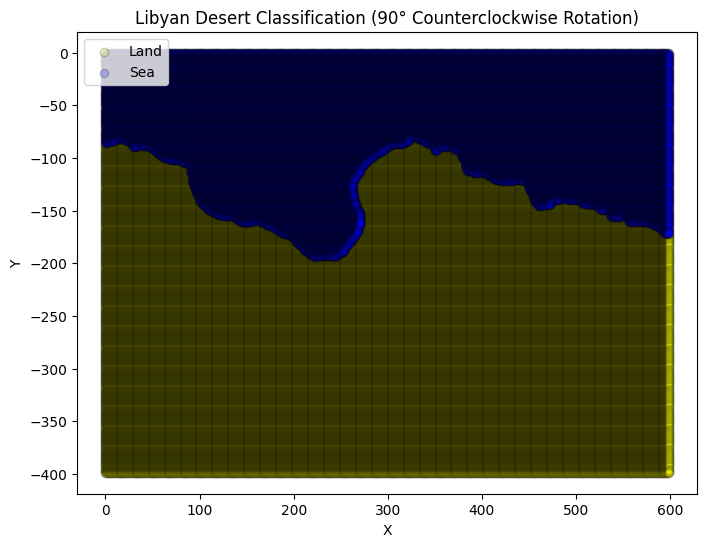

In [15]:
import matplotlib.pyplot as plt
# Apply 90-degree counterclockwise rotation transformation
df["x_rot"] = df["y"]
df["y_rot"] = -df["x"]

# Separate rotated data by label
land_rot = df[df["label"] == 1]
sea_rot = df[df["label"] == 0]

# Plot the rotated data
plt.figure(figsize=(8, 6))
plt.scatter(land_rot["x_rot"], land_rot["y_rot"], color="yellow", label="Land", alpha=0.2, edgecolors="black")
plt.scatter(sea_rot["x_rot"], sea_rot["y_rot"], color="blue", label="Sea", alpha=0.2, edgecolors="black")

# Labels and legend
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Libyan Desert Classification (90° Counterclockwise Rotation)")
plt.legend()
plt.show()